In [24]:
import pandas as pd
import lifelines as ll
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
TENURES = pd.read_csv('tenures-summarized-classified.csv')

In [11]:
TENURES.head()

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_censor,ending
0,kruger|01|03|ATL,L. Kruger,ATL,3,190,69,121,2001,2003,True,fired
1,stotts|03|04|ATL,T. Stotts,ATL,2,137,52,85,2003,2004,False,fired
2,woodson|05|10|ATL,M. Woodson,ATL,6,492,206,286,2005,2010,False,fired
3,drew|11|13|ATL,L. Drew,ATL,3,230,128,102,2011,2013,False,fired
4,budenholzer|14|16|ATL,M. Budenholzer,ATL,3,246,146,100,2014,2016,False,current


In [12]:
TENURES.ending.value_counts()

fired               112
interim only         39
resigned             26
current              20
contract expired      2
traded                2
retired               2
mutual                2
died                  1
Name: ending, dtype: int64

In [8]:
tenures = TENURES[TENURES.ending != 'interim only']

In [13]:
death_event = ['fired', 'contract expired', 'mutual']

In [14]:
tenures['death'] = (tenures.ending.isin(death_event) * 1)

In [20]:
tenures.sample(5)

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_censor,ending,death
178,weiss|06|06|SEAOKC,B. Weiss,SEAOKC,1,30,13,17,2006,2006,False,fired,1
192,brown|03|05|VANMEM,H. Brown,VANMEM,3,168,83,85,2003,2005,False,retired,0
50,saunders|06|08|DET,F. Saunders,DET,3,246,176,70,2006,2008,False,fired,1
78,negro|11|13|LAC,V. Del Negro,LAC,3,230,128,102,2011,2013,False,fired,1
161,cheeks|02|05|POR,M. Cheeks,POR,4,301,162,139,2002,2005,False,fired,1


In [21]:
kmf = ll.KaplanMeierFitter()

In [22]:
kmf.fit(tenures.games, event_observed=tenures.death)

<lifelines.KaplanMeierFitter: fitted with 167 observations, 52 censored>

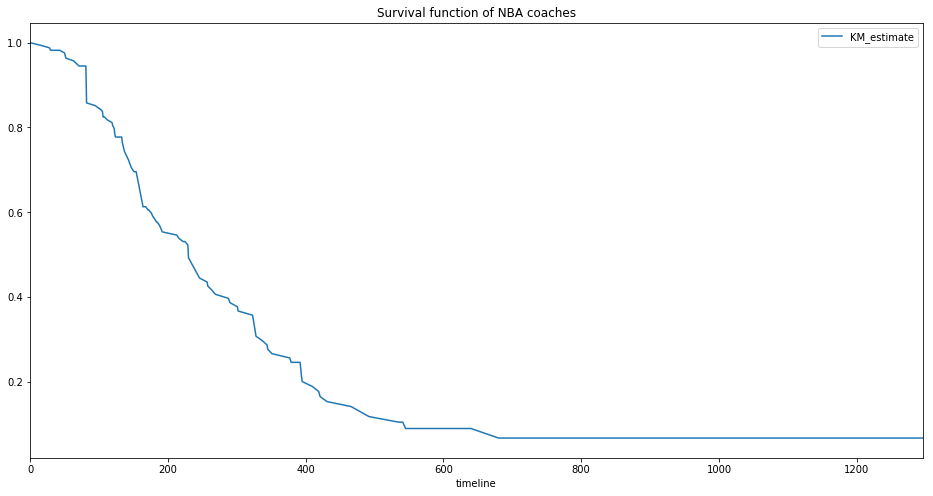

In [26]:
kmf.survival_function_.plot(figsize=(16,8))
plt.title('Survival function of NBA coaches');

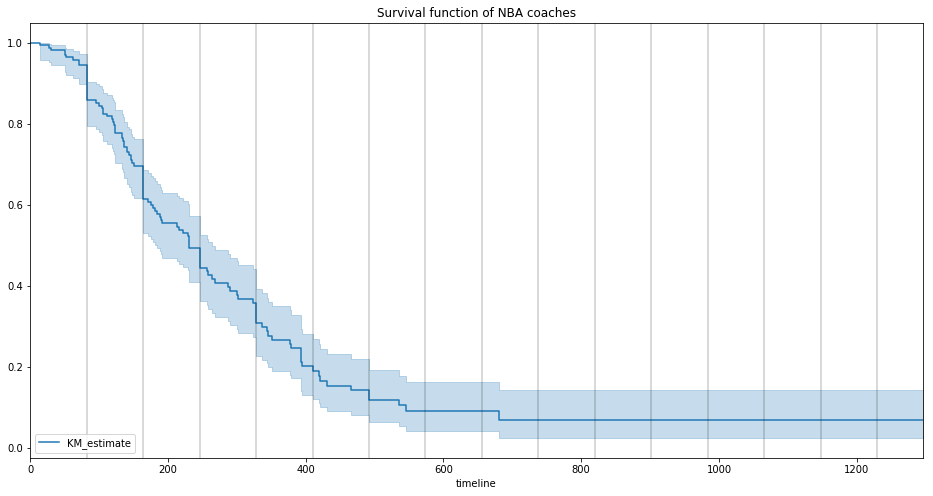

In [33]:
kmf.plot(figsize=(16,8))
[plt.axvline(g, c='black', alpha=0.2) for g in range(82, 82*20, 82)]
plt.title('Survival function of NBA coaches');